## Step 1: Reading and Understanding the Data

In [1]:
#For analysis and numerical functions
import pandas as pd
import numpy as np

#For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

#Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Missing value check

bike.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
#dropping the columns which is not required

bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [10]:
bike.shape

(730, 12)

In [11]:
# renaming few columns for better readibility

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [12]:
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
# Mapping the season, month, weekday columns

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow',4:'Heavy_rain'})


In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [15]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
bike.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

In [17]:
#Taking continous, categorical and target columns for creating plots/graphs

cont_cols=["temp", "atemp", "humidity", "windspeed"]
cat_cols=["season","month","holiday","weekday","workingday","weathersit"]
target=["cnt"]
cat_cols2=["year"]

len(cont_cols)+len(cat_cols)+len(target)+len(cat_cols2)

12

## Step 2: Visualizing the Data

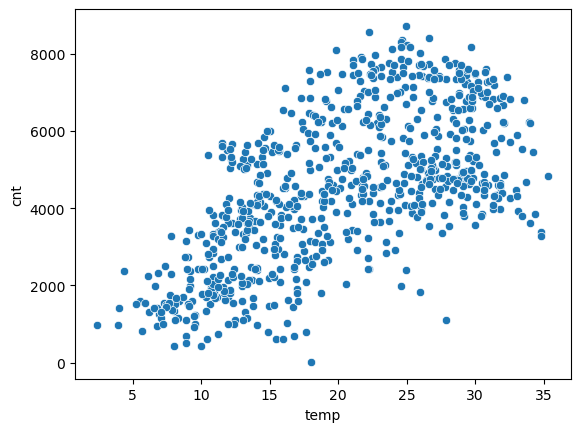

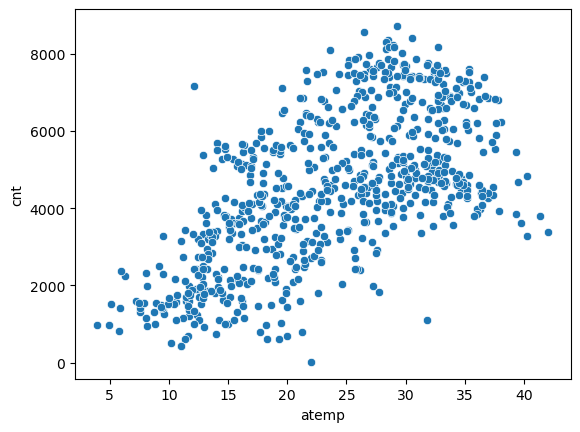

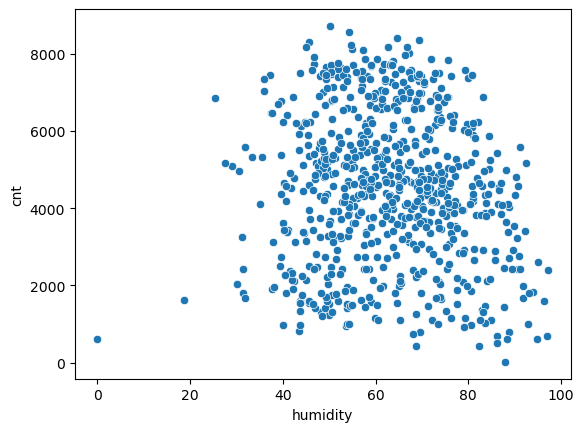

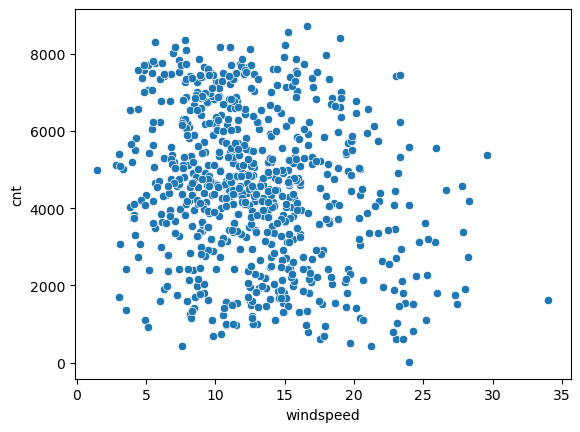

In [18]:
for i in cont_cols:
    sns.scatterplot(x=bike[i],y=bike["cnt"])
    plt.show()

<Axes: xlabel='year', ylabel='cnt'>

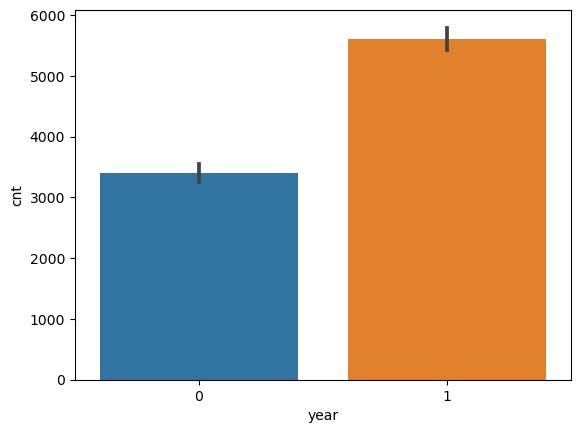

In [19]:
sns.barplot(x=bike['year'],y=bike['cnt'])

2019 has larger bookings compared to 2018.

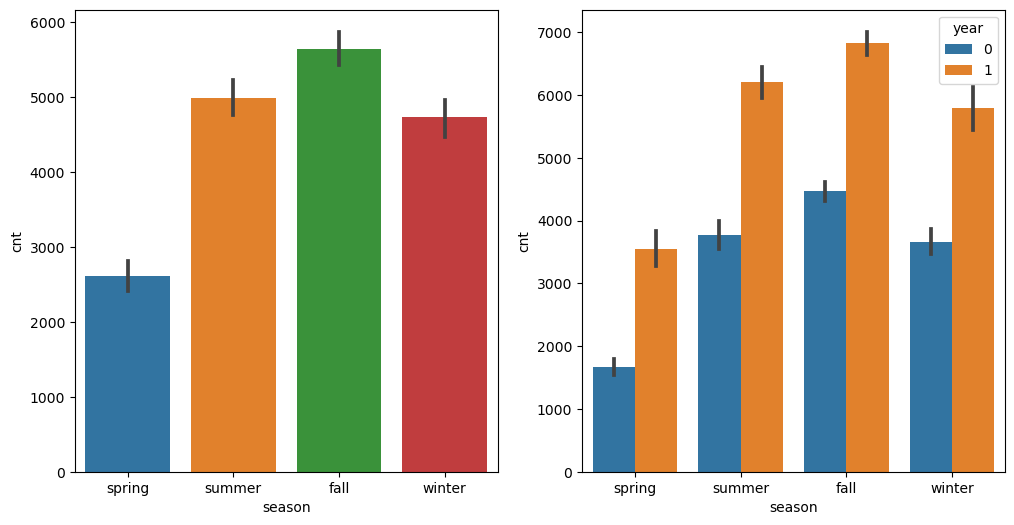

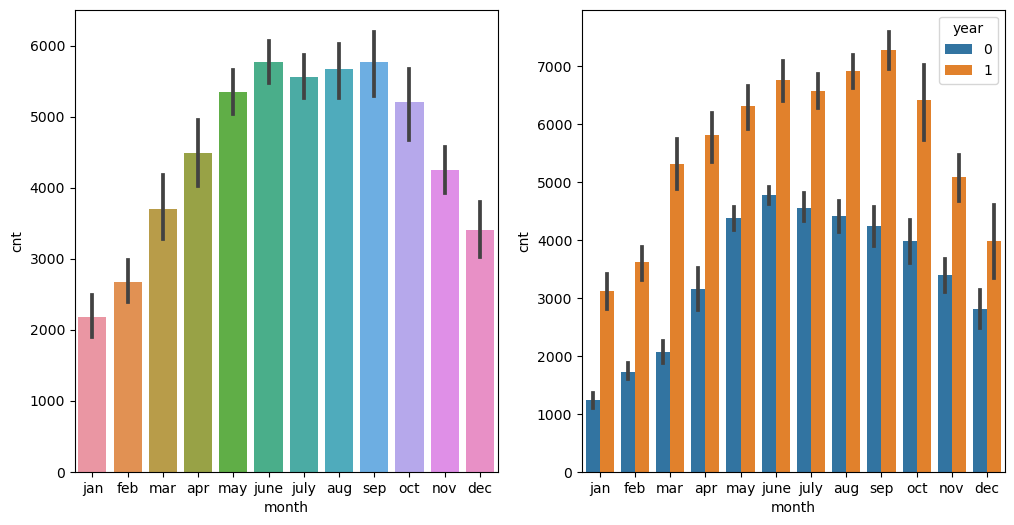

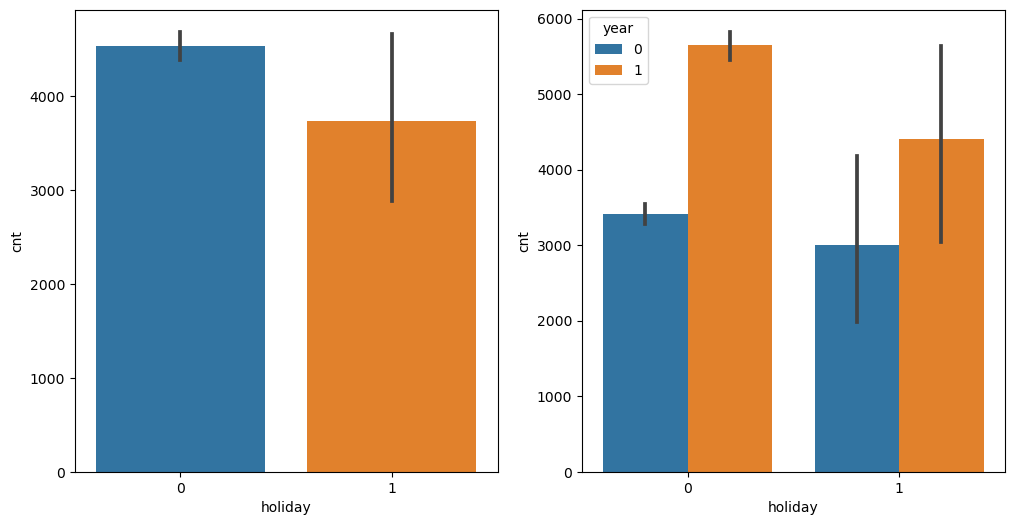

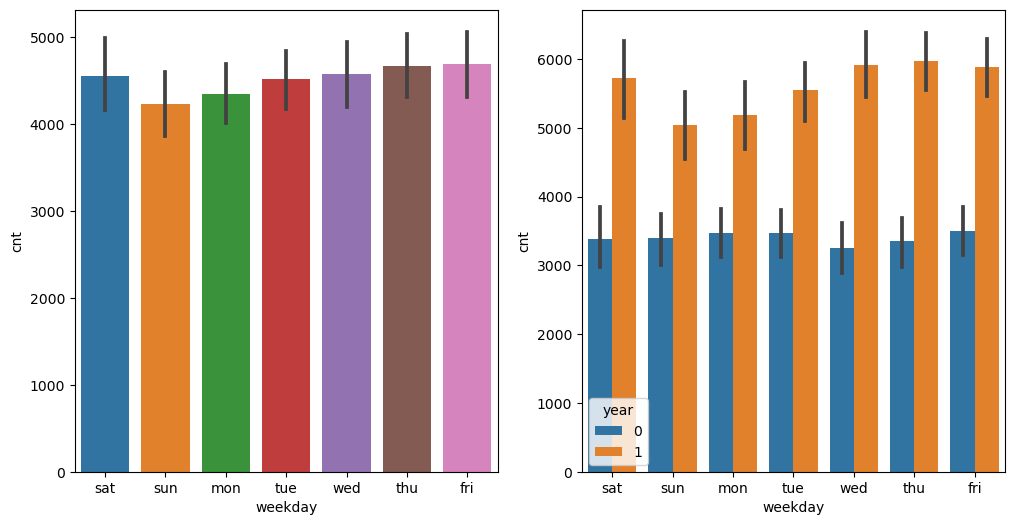

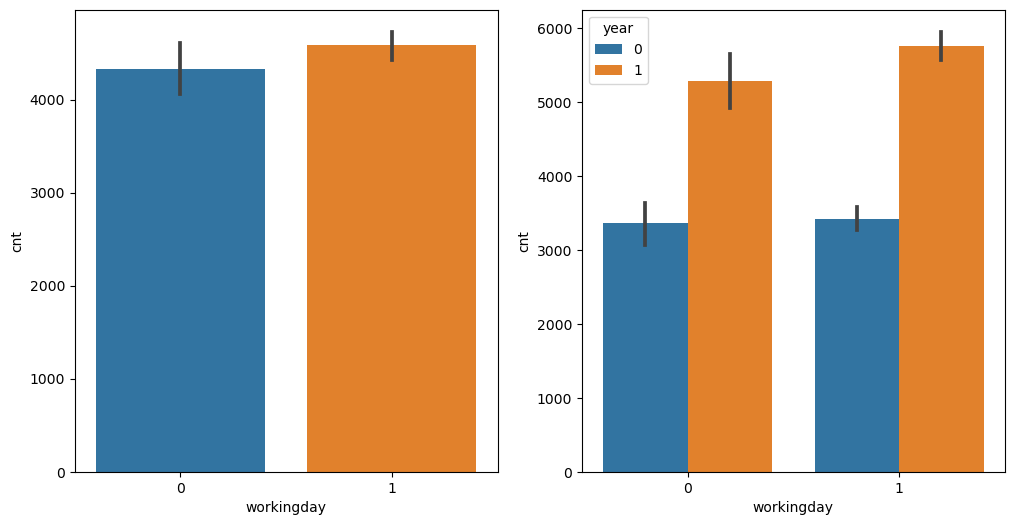

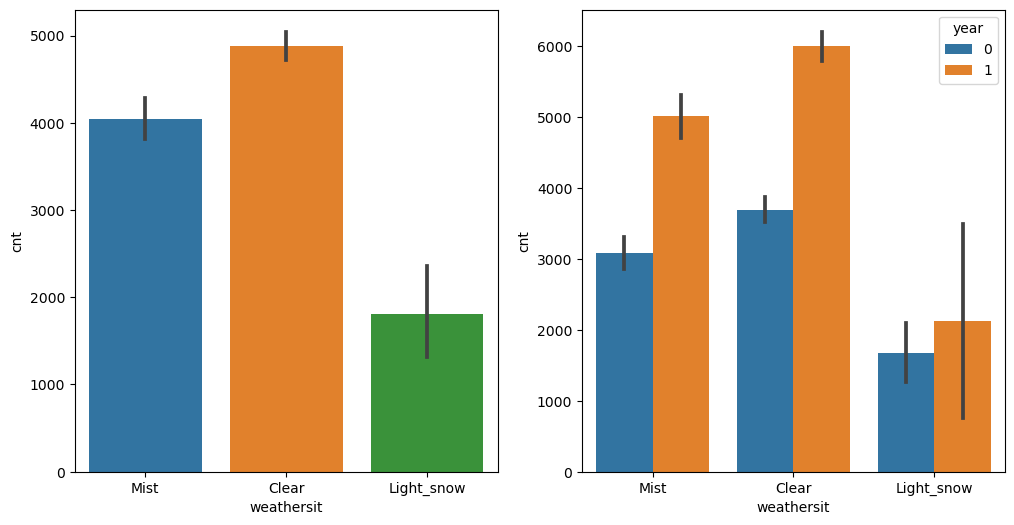

In [20]:
for i in cat_cols:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=bike[i],y=bike['cnt'])
    plt.subplot(1,2,2) 
    sns.barplot(x=bike[i],y=bike['cnt'],hue=bike['year'])
    plt.show()

- Fall season seems to have attracted more booking overall. Adding to that in each season the booking count has increased drastically from 2018 to 2019.


- Most of the bookings has been done during the month of May, June, July, August, September and October.Trend seems to be increasing from starting of the year till mid of the year peak is June and then it started to decrease as we approach the end of year. Number of booking for each month seems to have increased from 2018 to 2019.


- Booking is higher during non-holidays.


- Thursday, Friday, Saturday have more number of bookings as compared to the start of the week.


- On a working day we seem to have a bit increased booking compared to holiday/weekend. As usual we see drastic increase in booking in 2019 when compared to 2018.


- Clear weather attracted more booking. In comparison to 2018 booking increased for each weather situation in 2019.



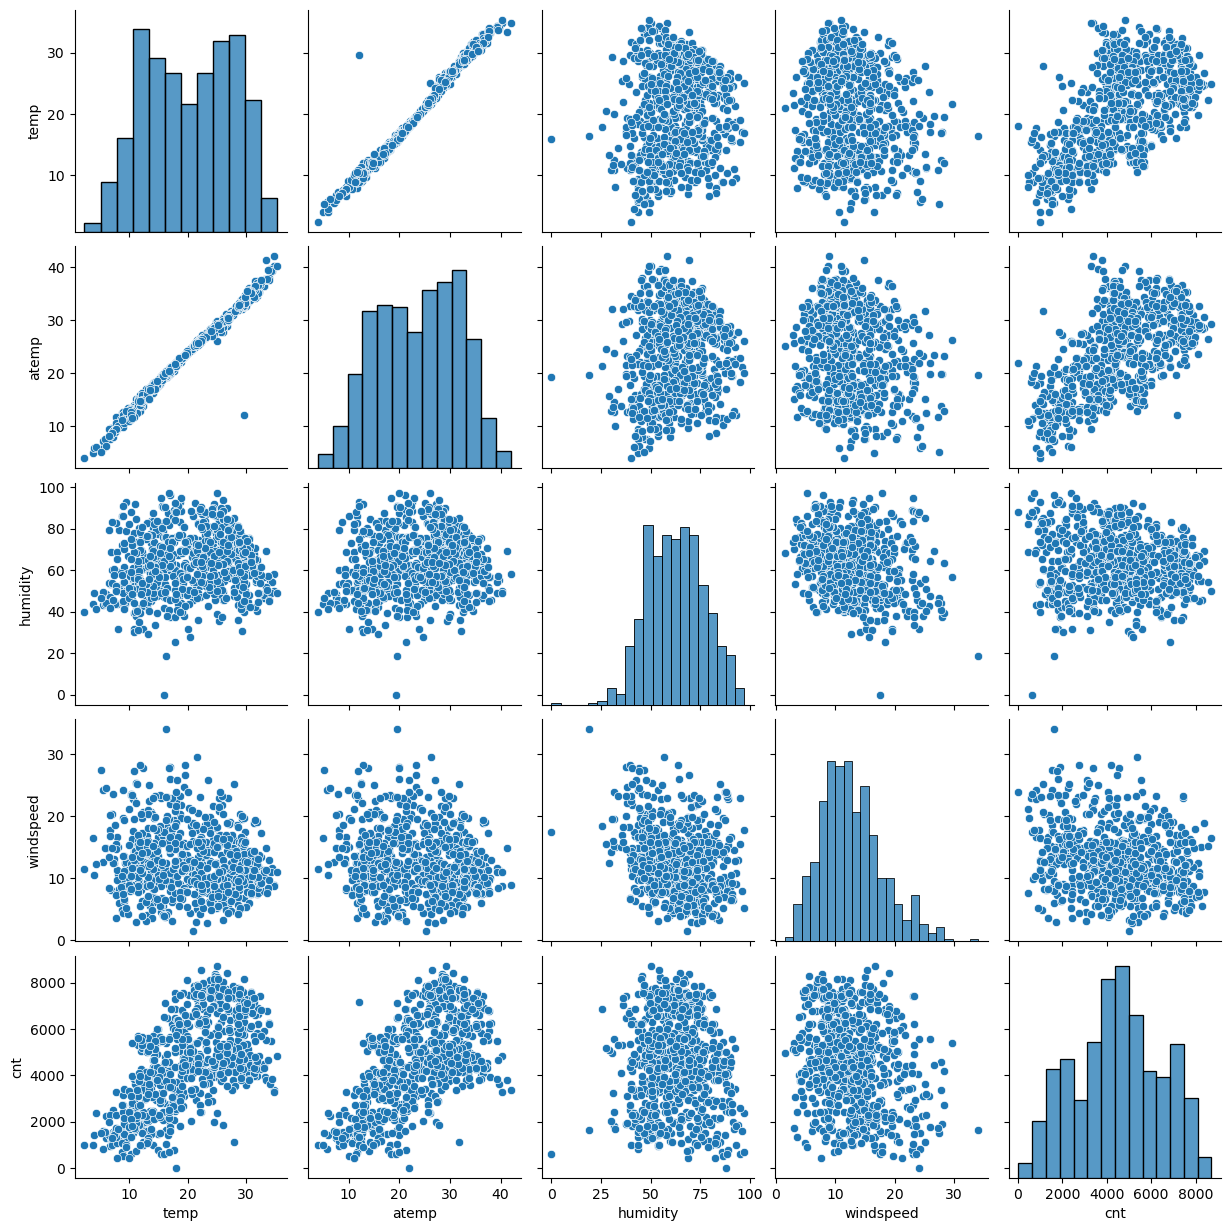

In [21]:
# Visualizing the numerical columns

sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

temp and atemp has highest correlation

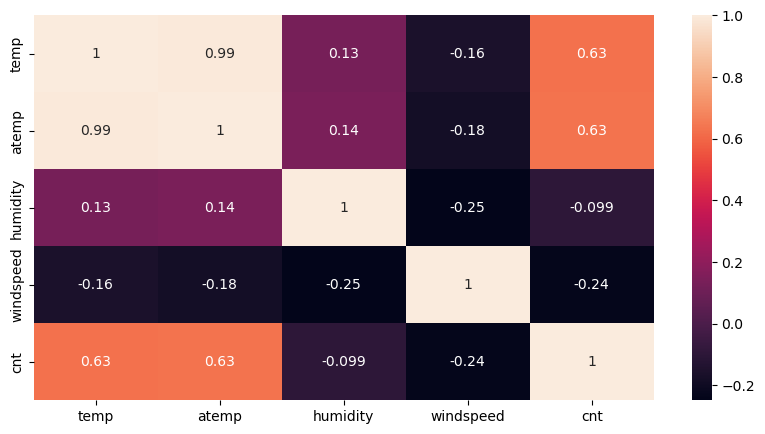

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(bike[cont_cols+["cnt"]].corr(),annot=True)
plt.show()

## Step 3: Data Preparing/Pre-Processing Steps

### Dummy Variable Creation

In [23]:
bike[cat_cols].nunique()

season         4
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [24]:
#Dummies = n-1
season_bike = pd.get_dummies(bike['season'], drop_first=True)
month_bike = pd.get_dummies(bike['month'], drop_first=True)
weekday_bike = pd.get_dummies(bike['weekday'], drop_first=True)
weathersit_bike = pd.get_dummies(bike['weathersit'], drop_first=True)

In [25]:
bike_new = pd.concat([bike, month_bike, weekday_bike, weathersit_bike, season_bike], axis=1)
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [26]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  june        730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [27]:
bike_new.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)

In [28]:
bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [29]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  july        730 non-null    uint8  
 13  june        730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sep         730 non-null    uint8  
 19  mon         730 non-null    u

In [30]:
bike_new.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snow', 'Mist', 'spring', 'summer', 'winter'],
      dtype='object')

## Step 4: Train-Test Split

In [31]:
# splitting the dataframe into Train and Test

np.random.seed(0)

bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [32]:
bike_train.shape

(510, 30)

In [33]:
bike_test.shape

(220, 30)

## Rescaling the Features

In [34]:
#Instantiate an object
scaler = MinMaxScaler()

In [35]:
# create a list of numeric vars

#Adding all the numeric value columns, neglection casual & registered since we have cnt

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

In [36]:
#Fit on data

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [37]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


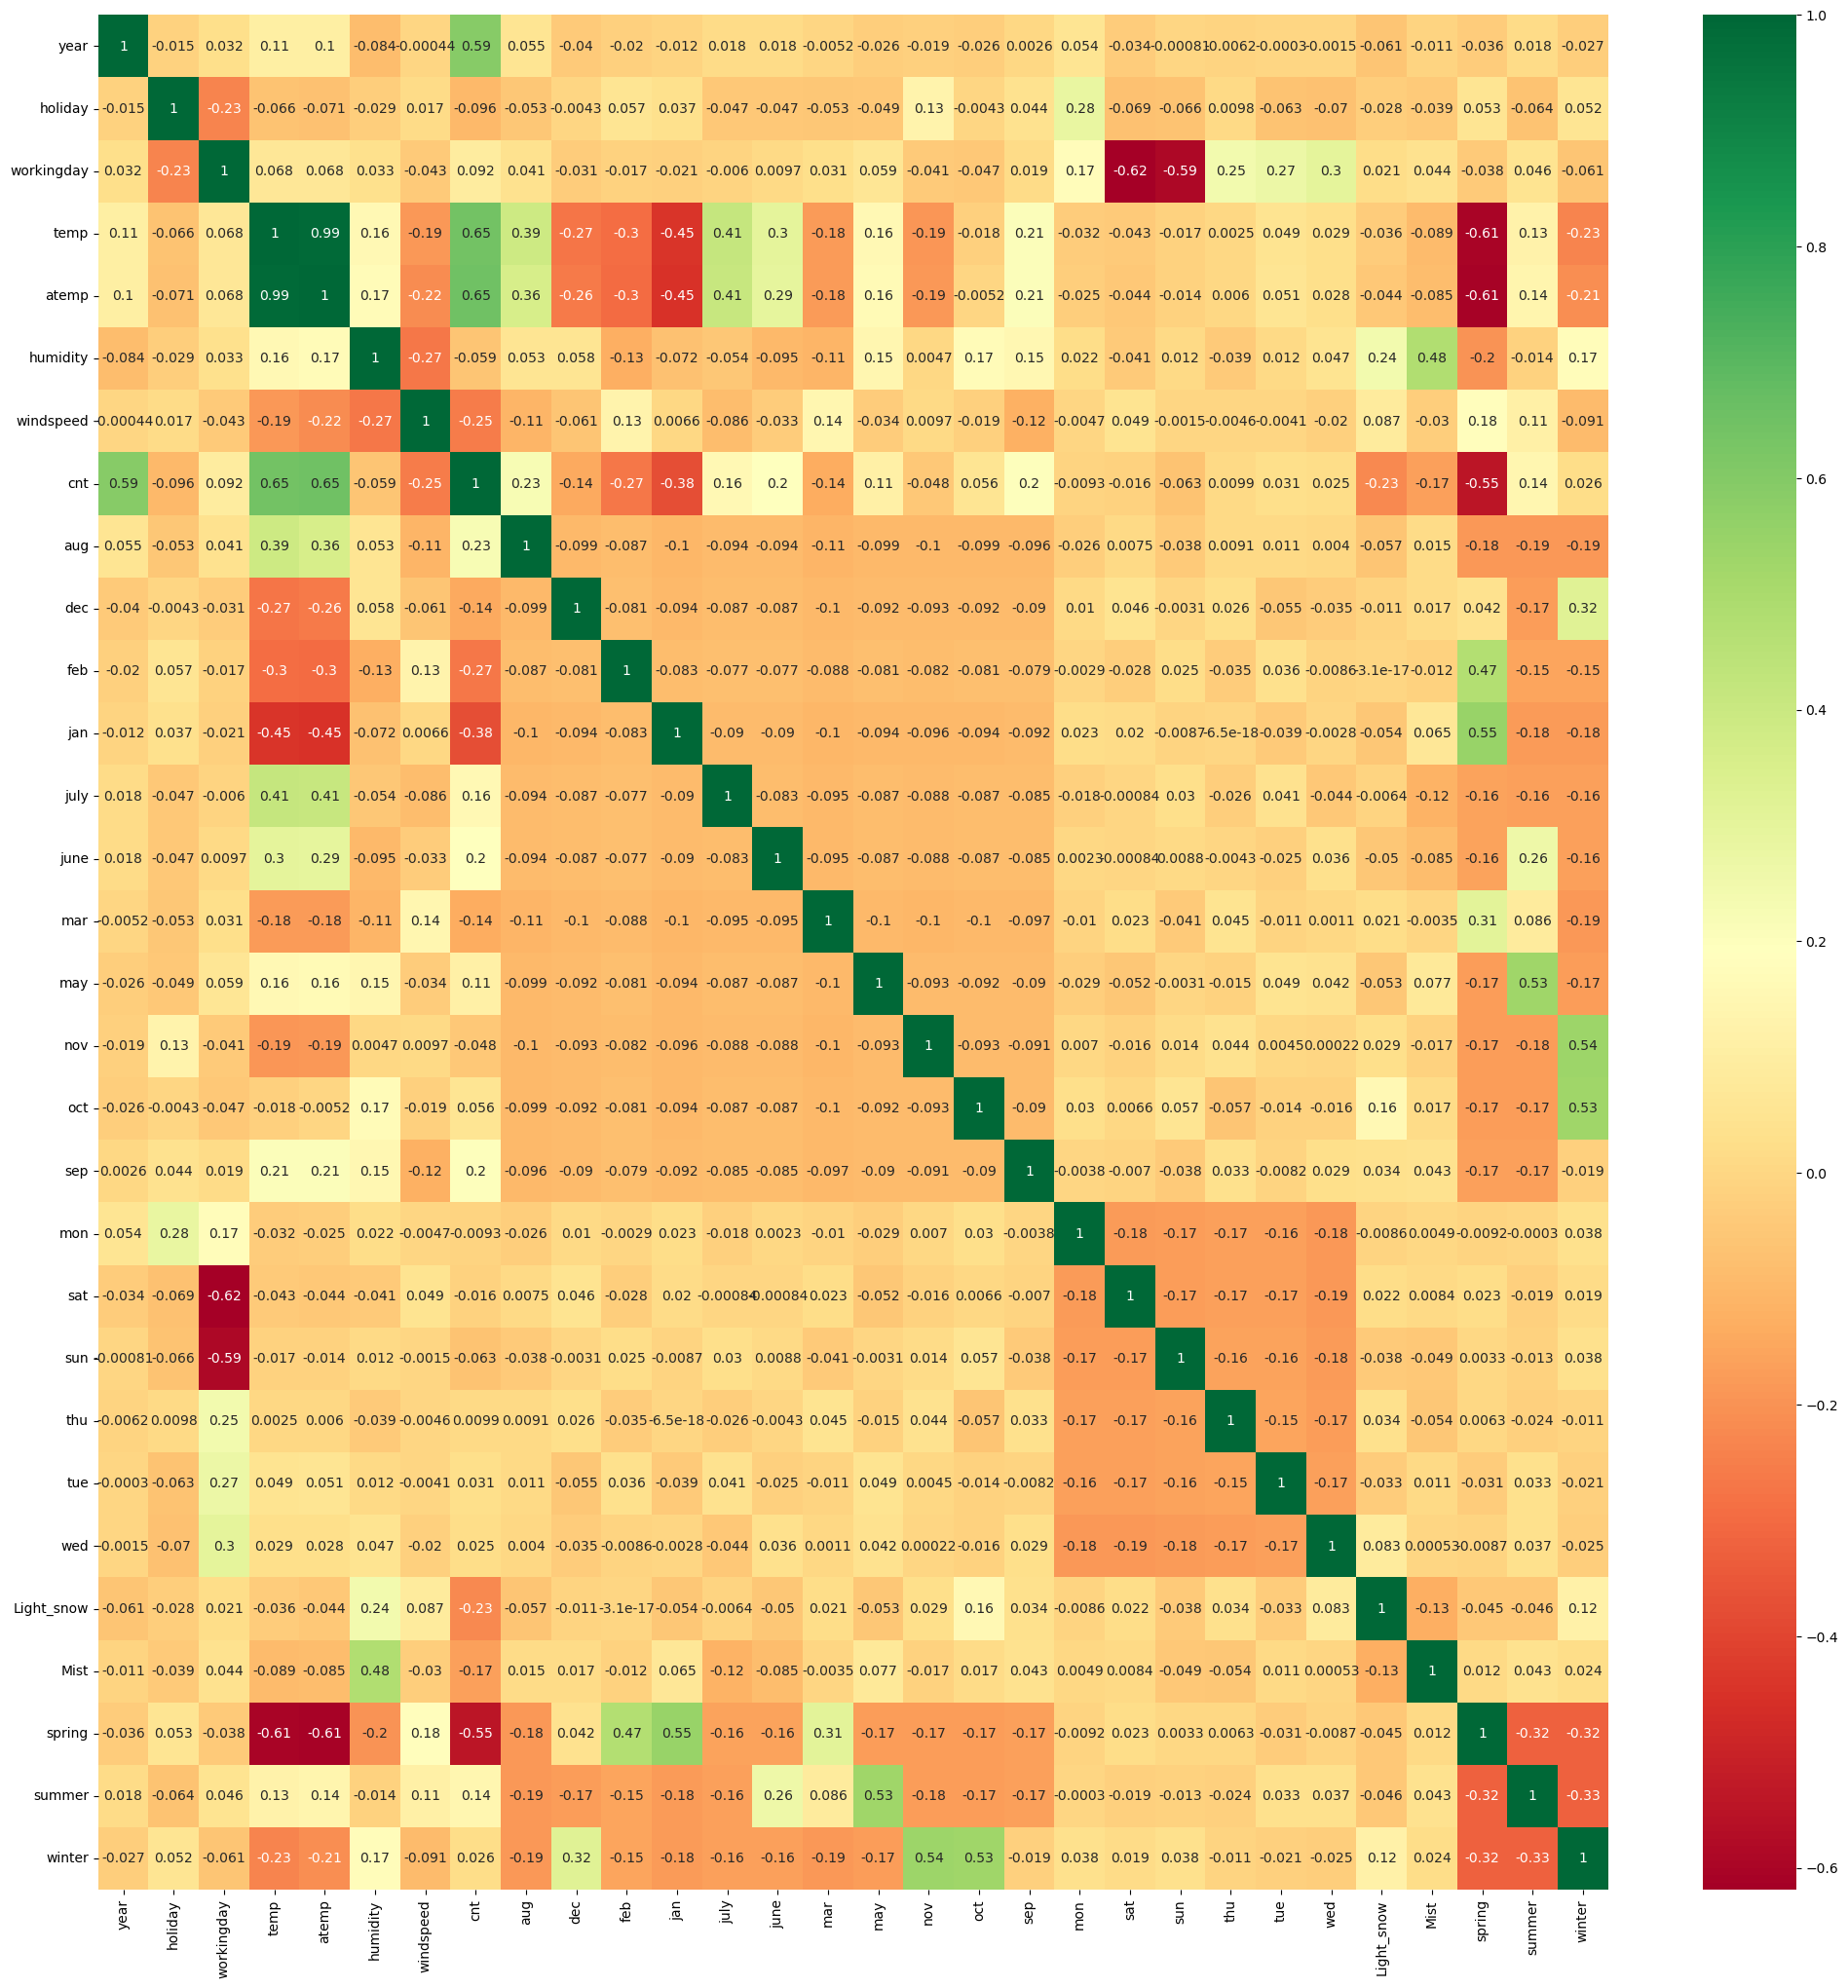

In [39]:
plt.figure(figsize=(25, 25))
sns.heatmap(bike_train.corr(),annot=True, cmap="RdYlGn")
plt.show()

- Temp and atemp seems to have correlation with cnt
- Humidity and mist have correlatiom
- Winter has correlation with October and November, similarly summer has correlation with May

## Training the Model

In [40]:
#X_train, y_train

y_train = bike_train.pop('cnt')
X_train = bike_train

### Feature Selection

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

rfe.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True])

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [43]:
#Building Model

def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [44]:
#Checking VIF

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [45]:
col = X_train.columns[rfe.support_]

In [46]:
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snow', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')

In [47]:
X_train_rfe = X_train[col]

## Step 5: Building a linear model

In [48]:
# Building 1st linear regression model

X_train_1 = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          4.22e-191
Time:                        22:48:03   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [49]:
#Calculating VIF for the model

checkVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist,2.29
0,year,2.09
9,sat,1.98


Dropping Features one by one where p-value > 0.05 and higher VIF. Here humidity has higher VIF so dropping it.

In [50]:
# Dropping humidity

X_train_new = X_train_rfe.drop(['humidity'], axis = 1)


In [51]:
# Building 2nd linear regression model

X_train_2 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.60e-188
Time:                        22:48:07   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.0

In [52]:
#Calculating VIF for new model

checkVIF(X_train_new)


,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


Temp has higher VIF so dropping.

In [53]:
X_train_new = X_train_new.drop(['temp'], axis = 1)


In [54]:
# Building 3rd linear regression model

X_train_3 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          6.44e-154
Time:                        22:48:09   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5444      0.020     27.118      0.0

In [55]:
#Calculating VIF for new model

checkVIF(X_train_new)


,Features,VIF
3,windspeed,4.27
2,workingday,3.83
10,spring,2.97
11,summer,2.29
12,winter,1.98
0,year,1.91
7,sat,1.69
4,jan,1.60
9,Mist,1.57
5,july,1.30


July has higher p-value. So dropping.

In [56]:
#Dropping July

X_train_new = X_train_new.drop(['july'], axis = 1)


In [57]:
# Building 4th linear regression model

X_train_4 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          5.73e-155
Time:                        22:48:11   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5406      0.018     29.655      0.0

In [58]:
#Calculating VIF for new model

checkVIF(X_train_new)


,Features,VIF
3,windspeed,4.12
2,workingday,3.54
9,spring,2.68
10,summer,2.01
0,year,1.89
11,winter,1.78
6,sat,1.62
4,jan,1.60
8,Mist,1.57
5,sep,1.20


Holiday has higher p-value. So dropping.

In [59]:
#Dropping holiday

X_train_new = X_train_new.drop(['holiday'], axis = 1)


In [60]:
# Building 5th linear regression model

X_train_5 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.01e-155
Time:                        22:48:14   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5332      0.018     30.023      0.0

In [61]:
#Calculating VIF for new model

checkVIF(X_train_new)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,2.00
0,year,1.88
10,winter,1.73
3,jan,1.60
7,Mist,1.57
5,sat,1.56
4,sep,1.18


Inference:

- All features p-value is less than 0.05 and VIF is also less than 5.
- R-squared and Adj. R-squared is 77.9% and 77.4% which is also very good indicator for a model

## Step 6: Residual Analysis

In [62]:
lr_model = sm.OLS(y_train, X_train_5).fit()
y_train_pred = lr_model.predict(X_train_5)
y_train_pred.head()

576    0.787605
426    0.452336
728    0.397957
482    0.683646
111    0.390873
dtype: float64

Text(0.5, 0, 'Errors')

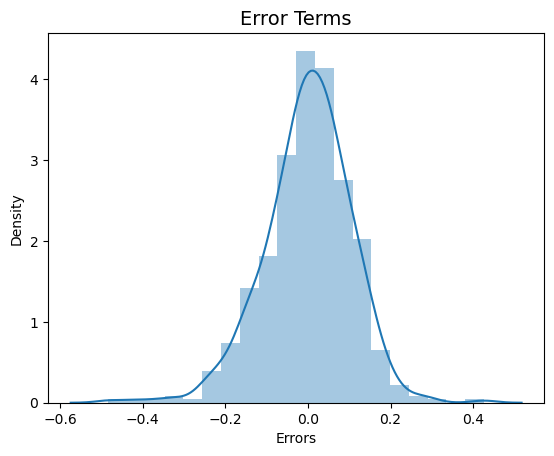

In [63]:
# Plotting the residuals for training set

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.title("Error Terms", fontsize=14)
plt.xlabel("Errors", fontsize=10)

Error terms are following normal distribution



## Step 7: Making Predictions Using the Final Model

In [64]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [65]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snow,Mist,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [67]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe

X_test_sm1 = sm.add_constant(X_test)

In [68]:
y_pred = lr_model.predict(X_test_sm1)

In [69]:
r2 = r2_score(y_test, y_pred)
print("R-Squared of Test Dataset:", round(r2,4))

R-Squared of Test Dataset: 0.7417


In [70]:
# Calculating Adjusted-R-Squared value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Adjusted R-Squared of Test Dataset:", adjusted_r2)

Adjusted R-Squared of Test Dataset: 0.7281


#  Comparision between Training and Testing dataset:

- R-Squared of Train Dataset: 0.779
- Adjusted R-Squared of Train Dataset: 0.774
- R-Squared of Test Dataset: 0.7417
- Adjusted R-Squared of Test Dataset: 0.7281